Oriol Colomé - AMPLab 2024 Essentia playlists assignment
Notebook by Oriol Colomé

In [1]:
#!pip install essentia-tensorflow pandas seaborn matplotlib tqdm seaborn

In [2]:
import random
from pathlib import Path
from IPython.display import Audio, clear_output
import json
import re
import csv
import pickle

import numpy as np
import essentia.standard as es
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

2024-03-02 16:54:18.226610: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Path to the MusAV dataset
musav_dataset_path = '/Users/oriolcolomefont/Documents/AMPLAB/Module 1/audio_chunks'

In [4]:
# Function to create a DataFrame with basic information about the dataset
def create_dataset_df(dataset_path):
    data = {'Track': [], 'Genre': [], 'Path': []}

    # Use Pathlib for file handling
    dataset_path = Path(dataset_path)

    # Iterate through audio files in the dataset using list comprehension
    audio_files = [f for f in dataset_path.rglob('*.mp3') if f.is_file()]

    for file in audio_files:
        genre = file.parent.name  # Extract genre using parent folder name
        data['Track'].append(file.name)
        data['Genre'].append(genre)
        data['Path'].append(str(file))  # Convert Path object to string

    return pd.DataFrame(data)

In [5]:
# Analyze the MusAV dataset and create a DataFrame
dataset_df = create_dataset_df(musav_dataset_path)

# Display basic statistics about the dataset
dataset_df.describe()

,Track,Genre,Path
count,2120,2120,2120
unique,2100,460,2120
top,7pFjc2VFPv8LRnYfNHE8iS.mp3,test_dataset,/Users/oriolcolomefont/Documents/AMPLAB/Module...
freq,2,20,1


In [6]:
# Access the full path from the 'Path' column
random_audio_file = str(dataset_df.sample(n=1)['Path'].values[0])

print(f'Random Full Path: {random_audio_file}')
Audio(random_audio_file)

Random Full Path: /Users/oriolcolomefont/Documents/AMPLAB/Module 1/audio_chunks/audio.005/5X/5XBWPJnBGkz7ZEN5uC65cN.mp3


In [7]:
# Load the whole file in stereo
mono_audio = es.MonoLoader(filename=random_audio_file)()
stereo_audio, _, _, _, _, _ = es.AudioLoader(filename=random_audio_file)()

print(mono_audio.shape)
print(stereo_audio.shape)

(1323001,)
(1323001, 2)


In [8]:
# Extract tempo using RhythmExtractor2013
rhythm_extractor = es.RhythmExtractor2013()
bpm, ticks, confidence, estimates, bpmIntervals = rhythm_extractor(mono_audio)

# Print track details
print(f'Selected Track: {random_audio_file}')
print(f'Tempo (BPM) using RhythmExtractor2013(): {bpm}')

Selected Track: /Users/oriolcolomefont/Documents/AMPLAB/Module 1/audio_chunks/audio.005/5X/5XBWPJnBGkz7ZEN5uC65cN.mp3
Tempo (BPM) using RhythmExtractor2013(): 95.53030395507812


In [9]:
# Extract key using KeyExtractor with different profiles
key_extractor_temperley = es.KeyExtractor(profileType='temperley')
key_extractor_krumhansl = es.KeyExtractor(profileType='krumhansl')
key_extractor_edma = es.KeyExtractor(profileType='edma')

# Extract key with different profiles
key_temperley, scale_temperley, _ = key_extractor_temperley(mono_audio)
key_krumhansl, scale_krumhansl, _ = key_extractor_krumhansl(mono_audio)
key_edma, scale_edma, _ = key_extractor_edma(mono_audio)

# Print track details and key information
print(f'Selected Track: {random_audio_file}')
print(f'Key and Scale using Temperley profile: {key_temperley} {scale_temperley}')
print(f'Key and Scale using Krumhansl profile: {key_krumhansl} {scale_krumhansl}')
print(f'Key and Scale using Edma profile: {key_edma} {scale_edma}')

Selected Track: /Users/oriolcolomefont/Documents/AMPLAB/Module 1/audio_chunks/audio.005/5X/5XBWPJnBGkz7ZEN5uC65cN.mp3
Key and Scale using Temperley profile: Ab major
Key and Scale using Krumhansl profile: Ab major
Key and Scale using Edma profile: Ab major


In [10]:
# Extract loudness using LoudnessEBUR128
loudness_extractor = es.LoudnessEBUR128()

# Extract loudness features
momentary_loudness, short_term_loudness, integrated_loudness, loudness_range = loudness_extractor(stereo_audio)

# Print track details and loudness information
print(f'Selected Track: {random_audio_file}')
print(f'Momentary Loudness: {momentary_loudness} LUFS')
print(f'Short-Term Loudness: {short_term_loudness} LUFS')
print(f'Integrated Loudness: {integrated_loudness} LUFS')
print(f'Loudness Range: {loudness_range} dB')

Selected Track: /Users/oriolcolomefont/Documents/AMPLAB/Module 1/audio_chunks/audio.005/5X/5XBWPJnBGkz7ZEN5uC65cN.mp3
Momentary Loudness: [-11.232917  -11.587566  -11.864392  -12.130576  -13.31213   -12.220778
 -11.284318   -9.66914    -9.397495  -10.255333   -9.497518  -11.185041
 -11.518832   -9.664539   -9.295391   -8.513106   -7.3290567  -7.4125385
  -8.065827   -8.474418   -9.736361  -10.839739  -12.090898  -13.182621
 -14.751558  -17.396837  -16.041862  -15.485845  -14.968384  -12.702346
 -11.726662  -10.605698   -9.608142   -9.632643   -9.424173   -9.506051
  -9.749302   -9.67813    -9.481184   -9.487273   -9.344833   -9.35964
  -9.141266   -8.806019   -8.51062    -8.162025   -8.672741   -9.056386
  -9.046143   -8.752689   -8.229336   -8.407999   -8.639774   -9.991737
 -11.447078  -11.952521  -13.622781  -13.423056  -10.984432  -10.230541
  -9.048271   -8.824722  -10.451874  -10.208113  -10.002212  -10.063342
  -9.600734   -9.953392  -11.095023  -10.972039  -10.8785925 -10.82340

In [11]:
"""Audio embedding models trained with classification and contrastive learning objectives using an in-house dataset annotated with Discogs metadata. 
The classification model was trained to predict music style labels. The contrastive learning models were trained to learn music similarity capable of 
grouping audio tracks coming from the same artist, label (record label), release (album), or segments of the same track itself (self-supervised learning). 
Additionally, multi was trained in multiple similarity targets simultaneously."""

model_EffnetDiscogs = es.TensorflowPredictEffnetDiscogs(graphFilename="discogs-effnet-bs64-1.pb", output="PartitionedCall:1")
embeddings_discogs_effnet = model_EffnetDiscogs(mono_audio)
print(embeddings_discogs_effnet)
embeddings_discogs_effnet.shape

[[ 0.6054311  -0.0541784  -0.05237721 ...  0.06249341  0.08080113
  -0.02949675]
 [ 0.36713585 -0.04359602 -0.04608879 ...  0.05499608  0.10359273
   0.0076527 ]
 [ 0.10214665 -0.01868437 -0.03899509 ...  0.00661516  0.12547034
  -0.01734535]
 ...
 [ 0.06334104 -0.01923059 -0.01913786 ... -0.0337073   0.09006765
  -0.01598429]
 [ 0.06682227 -0.0190488   0.01848056 ... -0.04273865  0.04573853
  -0.00809564]
 [ 0.11974579  0.00421906  0.01646659 ... -0.03785339  0.03698355
   0.01315696]]


[   INFO   ] TensorflowPredict: Successfully loaded graph file: `discogs-effnet-bs64-1.pb`
2024-03-02 16:54:25.645745: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled


(82, 1280)

In [12]:
#A Music embedding extractor based on auto-tagging with the 50 most common tags of the Million Song Dataset.
model_MSD_MUSICNN = es.TensorflowPredictMusiCNN(graphFilename="msd-musicnn-1.pb", output="model/dense/BiasAdd")
embeddings_msd_musicnn = model_MSD_MUSICNN(mono_audio)
print(embeddings_msd_musicnn)
embeddings_msd_musicnn.shape

[[-0.08528955 -0.85128844  0.6960176  ...  1.0307965   1.2834914
   1.0792996 ]
 [ 0.09069635  1.8584119  -0.24793446 ...  1.2051992   2.1082106
   0.7039941 ]
 [-1.0496162   0.5372374  -0.04530764 ...  2.452805    3.3335273
   0.50186867]
 ...
 [-2.8853278  -2.4690762   0.4103974  ...  3.0437698   0.796996
   0.95421624]
 [-2.1738467  -2.6641064   0.3007512  ...  3.0455494   0.53767323
   0.8620944 ]
 [-2.8588705  -3.5269752   0.4793942  ...  3.291204    0.08191687
   0.2156896 ]]


[   INFO   ] TensorflowPredict: Successfully loaded graph file: `msd-musicnn-1.pb`


(54, 200)

In [13]:
#Music style classification by 400 styles from the Discogs taxonomy:
"""
Blues: Boogie Woogie, Chicago Blues, Country Blues, Delta Blues, Electric Blues, Harmonica Blues, Jump Blues, Louisiana Blues, Modern Electric Blues, Piano Blues, Rhythm & Blues, Texas Blues
Brass & Military: Brass Band, Marches, Military Children's: Educational, Nursery Rhymes, Story
Classical: Baroque, Choral, Classical, Contemporary, Impressionist, Medieval, Modern, Neo-Classical, Neo-Romantic, Opera, Post-Modern, Renaissance, Romantic
Electronic: Abstract, Acid, Acid House, Acid Jazz, Ambient, Bassline, Beatdown, Berlin-School, Big Beat, Bleep, Breakbeat, Breakcore, Breaks, Broken Beat, Chillwave, Chiptune, Dance-pop, Dark Ambient, Darkwave, Deep House, Deep Techno, Disco, Disco Polo, Donk, Downtempo, Drone, Drum n Bass, Dub, Dub Techno, Dubstep, Dungeon Synth, EBM, Electro, Electro House, Electroclash, Euro House, Euro-Disco, Eurobeat, Eurodance, Experimental, Freestyle, Future Jazz, Gabber, Garage House, Ghetto, Ghetto House, Glitch, Goa Trance, Grime, Halftime, Hands Up, Happy Hardcore, Hard House, Hard Techno, Hard Trance, Hardcore, Hardstyle, Hi NRG, Hip Hop, Hip-House, House, IDM, Illbient, Industrial, Italo House, Italo-Disco, Italodance, Jazzdance, Juke, Jumpstyle, Jungle, Latin, Leftfield, Makina, Minimal, Minimal Techno, Modern Classical, Musique Concrète, Neofolk, New Age, New Beat, New Wave, Noise, Nu-Disco, Power Electronics, Progressive Breaks, Progressive House, Progressive Trance, Psy-Trance, Rhythmic Noise, Schranz, Sound Collage, Speed Garage, Speedcore, Synth-pop, Synthwave, Tech House, Tech Trance, Techno, Trance, Tribal, Tribal House, Trip Hop, Tropical House, UK Garage, Vaporwave
Folk, World, & Country: African, Bluegrass, Cajun, Canzone Napoletana, Catalan Music, Celtic, Country, Fado, Flamenco, Folk, Gospel, Highlife, Hillbilly, Hindustani, Honky Tonk, Indian Classical, Laïkó, Nordic, Pacific, Polka, Raï, Romani, Soukous, Séga, Volksmusik, Zouk, Éntekhno
Funk / Soul: Afrobeat, Boogie, Contemporary R&B, Disco, Free Funk, Funk, Gospel, Neo Soul, New Jack Swing, P.Funk, Psychedelic, Rhythm & Blues, Soul, Swingbeat, UK Street Soul
Hip Hop: Bass Music, Boom Bap, Bounce, Britcore, Cloud Rap, Conscious, Crunk, Cut-up/DJ, DJ Battle Tool, Electro, G-Funk, Gangsta, Grime, Hardcore Hip-Hop, Horrorcore, Instrumental, Jazzy Hip-Hop, Miami Bass, Pop Rap, Ragga HipHop, RnB/Swing, Screw, Thug Rap, Trap, Trip Hop, Turntablism
Jazz: Afro-Cuban Jazz, Afrobeat, Avant-garde Jazz, Big Band, Bop, Bossa Nova, Contemporary Jazz, Cool Jazz, Dixieland, Easy Listening, Free Improvisation, Free Jazz, Fusion, Gypsy Jazz, Hard Bop, Jazz-Funk, Jazz-Rock, Latin Jazz, Modal, Post Bop, Ragtime, Smooth Jazz, Soul-Jazz, Space-Age, Swing
Latin: Afro-Cuban, Baião, Batucada, Beguine, Bolero, Boogaloo, Bossanova, Cha-Cha, Charanga, Compas, Cubano, Cumbia, Descarga, Forró, Guaguancó, Guajira, Guaracha, MPB, Mambo, Mariachi, Merengue, Norteño, Nueva Cancion, Pachanga, Porro, Ranchera, Reggaeton, Rumba, Salsa, Samba, Son, Son Montuno, Tango, Tejano, Vallenato
Non-Music: Audiobook, Comedy, Dialogue, Education, Field Recording, Interview, Monolog, Poetry, Political, Promotional, Radioplay, Religious, Spoken Word
Pop: Ballad, Bollywood, Bubblegum, Chanson, City Pop, Europop, Indie Pop, J-pop, K-pop, Kayōkyoku, Light Music, Music Hall, Novelty, Parody, Schlager, Vocal
Reggae: Calypso, Dancehall, Dub, Lovers Rock, Ragga, Reggae, Reggae-Pop, Rocksteady, Roots Reggae, Ska, Soca
Rock: AOR, Acid Rock, Acoustic, Alternative Rock, Arena Rock, Art Rock, Atmospheric Black Metal, Avantgarde, Beat, Black Metal, Blues Rock, Brit Pop, Classic Rock, Coldwave, Country Rock, Crust, Death Metal, Deathcore, Deathrock, Depressive Black Metal, Doo Wop, Doom Metal, Dream Pop, Emo, Ethereal, Experimental, Folk Metal, Folk Rock, Funeral Doom Metal, Funk Metal, Garage Rock, Glam, Goregrind, Goth Rock, Gothic Metal, Grindcore, Grunge, Hard Rock, Hardcore, Heavy Metal, Indie Rock, Industrial, Krautrock, Lo-Fi, Lounge, Math Rock, Melodic Death Metal, Melodic Hardcore, Metalcore, Mod, Neofolk, New Wave, No Wave, Noise, Noisecore, Nu Metal, Oi, Parody, Pop Punk, Pop Rock, Pornogrind, Post Rock, Post-Hardcore, Post-Metal, Post-Punk, Power Metal, Power Pop, Power Violence, Prog Rock, Progressive Metal, Psychedelic Rock, Psychobilly, Pub Rock, Punk, Rock & Roll, Rockabilly, Shoegaze, Ska, Sludge Metal, Soft Rock, Southern Rock, Space Rock, Speed Metal, Stoner Rock, Surf, Symphonic Rock, Technical Death Metal, Thrash, Twist, Viking Metal, Yé-Yé
Stage & Screen: Musical, Score, Soundtrack, Theme
"""

model_GENRE_CLASS = es.TensorflowPredict2D(graphFilename="genre_discogs400-discogs-effnet-1.pb", input="serving_default_model_Placeholder", output="PartitionedCall:0")
predictions_genre_class = model_GENRE_CLASS(embeddings_discogs_effnet)
print(predictions_genre_class[1].mean())
predictions_genre_class.shape

[   INFO   ] TensorflowPredict: Successfully loaded graph file: `genre_discogs400-discogs-effnet-1.pb`


0.00434356


[   INFO   ] TensorflowPredict: Successfully loaded graph file: `genre_discogs400-discogs-effnet-1.pb`


(82, 400)

In [14]:
#Classification of music by presence or absence of voice (2 classes):
#instrumental, voice
model_Predict2D_voice = es.TensorflowPredict2D(graphFilename="voice_instrumental-discogs-effnet-1.pb", output="model/Softmax")
predictions_voice_ins = model_Predict2D_voice(embeddings_discogs_effnet)
print(predictions_voice_ins)
predictions_voice_ins.shape

[   INFO   ] TensorflowPredict: Successfully loaded graph file: `voice_instrumental-discogs-effnet-1.pb`


[[0.9838028  0.01619716]
 [0.8060984  0.1939016 ]
 [0.8594903  0.14050974]
 [0.93814945 0.06185048]
 [0.9127631  0.08723685]
 [0.5333055  0.4666945 ]
 [0.5347911  0.46520886]
 [0.88457763 0.11542237]
 [0.967284   0.03271595]
 [0.9723308  0.02766915]
 [0.9727586  0.02724144]
 [0.9788007  0.02119932]
 [0.9803059  0.0196941 ]
 [0.95776176 0.04223824]
 [0.94502467 0.05497536]
 [0.9965094  0.00349061]
 [0.9812222  0.01877775]
 [0.9248267  0.07517336]
 [0.95768106 0.04231889]
 [0.9586775  0.04132257]
 [0.9528927  0.04710726]
 [0.8731198  0.12688023]
 [0.87816465 0.12183537]
 [0.99493307 0.0050669 ]
 [0.99698824 0.00301174]
 [0.9747687  0.02523126]
 [0.9681461  0.03185391]
 [0.93384194 0.06615806]
 [0.8992005  0.10079953]
 [0.91123855 0.08876142]
 [0.9261614  0.07383856]
 [0.9806207  0.01937928]
 [0.9747354  0.02526463]
 [0.94504946 0.0549505 ]
 [0.9789556  0.02104439]
 [0.95490646 0.04509355]
 [0.9806671  0.01933292]
 [0.9804088  0.01959117]
 [0.9647726  0.03522738]
 [0.95009196 0.04990801]


[   INFO   ] TensorflowPredict: Successfully loaded graph file: `voice_instrumental-discogs-effnet-1.pb`


(82, 2)

In [15]:
danceability = es.Danceability()

danceability, dfa = danceability(mono_audio)

print(f"Danceability: {danceability}. Normal values range from 0 to ~3. The higher, the more danceable.")
print(f"DFA exponent vector for considered segment length (tau) values: {dfa}")

Danceability: 1.2210373878479004. Normal values range from 0 to ~3. The higher, the more danceable.
DFA exponent vector for considered segment length (tau) values: [0.98847574 0.9418095  0.8944983  0.86349463 0.85799783 0.8744422
 0.9074843  0.9449621  0.9699864  0.98493874 0.9970072  1.0086055
 1.0064874  0.9838938  0.9604955  0.9401437  0.9238143  0.9155534
 0.9001898  0.87188184 0.8068378  0.7413344  0.6771932  0.61955774
 0.52953804 0.48306    0.55758446 0.5970773  0.6232699  0.6325808
 0.6450305  0.6804576  0.71790063 0.7949345  0.82162935]


In [16]:
#Music arousal and valence regression with the emoMusic dataset (2 dimensions, range [1, 9]):
#valence, arousal

model_EMO_MSD = es.TensorflowPredict2D(graphFilename="emomusic-msd-musicnn-2.pb", output="model/Identity")
predictions_val_arou = model_EMO_MSD(embeddings_msd_musicnn)
print(predictions_val_arou)
predictions_val_arou.shape

[[3.58041   4.495338 ]
 [3.8090003 4.758617 ]
 [3.666476  4.604204 ]
 [3.1810691 4.4224453]
 [3.1698723 4.17475  ]
 [3.4012554 4.2786293]
 [3.6720703 4.7713256]
 [3.560826  4.777376 ]
 [3.4383838 4.6601977]
 [3.328222  4.5880775]
 [3.3505266 4.5821285]
 [2.8726466 4.1002264]
 [2.8689315 4.3566127]
 [3.6069376 4.6282096]
 [4.119589  5.201912 ]
 [4.112725  5.1297884]
 [3.6910536 4.5148783]
 [3.4392292 4.4527807]
 [3.4553392 4.325387 ]
 [3.6992419 4.3075147]
 [3.5811713 4.183315 ]
 [3.6011226 4.2555623]
 [3.2768085 4.636404 ]
 [3.5547411 3.4131277]
 [3.8661544 4.399394 ]
 [3.9603093 4.804812 ]
 [3.221281  4.4801583]
 [3.614165  4.4728417]
 [3.7943084 3.786223 ]
 [3.5895085 3.8729692]
 [3.607124  4.1310716]
 [3.9089057 4.759057 ]
 [3.4370387 4.92557  ]
 [3.431587  4.558891 ]
 [3.7413719 5.030093 ]
 [3.3406157 4.812288 ]
 [3.4064362 5.081993 ]
 [3.4975286 4.9000783]
 [3.2700784 4.9370008]
 [3.3732064 4.991147 ]
 [3.9254925 4.9882536]
 [3.7979462 4.723684 ]
 [3.3615315 4.3010488]
 [3.1679862

[   INFO   ] TensorflowPredict: Successfully loaded graph file: `emomusic-msd-musicnn-2.pb`


(54, 2)

In [17]:
# Instantiate algorithms once
#Tempo (BPM)
rhythm_extractor = es.RhythmExtractor2013()
#Key
key_extractors = {
    "temperley": es.KeyExtractor(profileType="temperley"),
    "krumhansl": es.KeyExtractor(profileType="krumhansl"),
    "edma": es.KeyExtractor(profileType="edma"),
} 
#Loudness
loudness_extractor = es.LoudnessEBUR128()
model_EffnetDiscogs = es.TensorflowPredictEffnetDiscogs(graphFilename="discogs-effnet-bs64-1.pb", output="PartitionedCall:1")
model_MSD_MUSICNN = es.TensorflowPredictMusiCNN(graphFilename="msd-musicnn-1.pb", output="model/dense/BiasAdd")
model_GENRE_CLASS = es.TensorflowPredict2D(graphFilename="genre_discogs400-discogs-effnet-1.pb", input="serving_default_model_Placeholder", output="PartitionedCall:0")
model_Predict2D_voice = es.TensorflowPredict2D(graphFilename="voice_instrumental-discogs-effnet-1.pb", output="model/Softmax")
#Danceability
danceability = es.Danceability()
model_EMO_MSD = es.TensorflowPredict2D(graphFilename="emomusic-msd-musicnn-2.pb", output="model/Identity")

[   INFO   ] TensorflowPredict: Successfully loaded graph file: `discogs-effnet-bs64-1.pb`
[   INFO   ] TensorflowPredict: Successfully loaded graph file: `msd-musicnn-1.pb`
[   INFO   ] TensorflowPredict: Successfully loaded graph file: `genre_discogs400-discogs-effnet-1.pb`
[   INFO   ] TensorflowPredict: Successfully loaded graph file: `voice_instrumental-discogs-effnet-1.pb`
[   INFO   ] TensorflowPredict: Successfully loaded graph file: `emomusic-msd-musicnn-2.pb`


In [18]:
# Extract features
bpm, _, _, _, _ = rhythm_extractor(mono_audio)
# Extract key with different profiles
key_temperley, scale_temperley, _ = key_extractors["temperley"](mono_audio)
key_krumhansl, scale_krumhansl, _ = key_extractors["krumhansl"](mono_audio)
key_edma, scale_edma, _ = key_extractors["edma"](mono_audio)
momentary_loudness, short_term_loudness, integrated_loudness, loudness_range = loudness_extractor(stereo_audio)
predictions_genre_class = model_GENRE_CLASS(model_EffnetDiscogs(mono_audio))
predictions_voice_vs_ins = model_Predict2D_voice(model_EffnetDiscogs(mono_audio))
danceability, dfa = danceability(mono_audio)
predictions_val_vs_arou = model_EMO_MSD(model_MSD_MUSICNN(mono_audio))

[   INFO   ] TensorflowPredict: Successfully loaded graph file: `genre_discogs400-discogs-effnet-1.pb`
[   INFO   ] TensorflowPredict: Successfully loaded graph file: `voice_instrumental-discogs-effnet-1.pb`


In [19]:
predictions_genre_class

array([[5.82698362e-07, 2.42311671e-05, 4.03104990e-04, ...,
        7.97550718e-04, 1.88610819e-03, 9.92534682e-04],
       [3.43738111e-06, 7.46734950e-05, 1.26411635e-02, ...,
        1.98884620e-04, 1.38990453e-03, 7.63205462e-04],
       [1.84820112e-06, 7.26309736e-06, 4.37529117e-04, ...,
        7.02273159e-04, 6.95191836e-03, 4.72074840e-03],
       ...,
       [3.05649519e-05, 7.27887545e-03, 1.27767855e-02, ...,
        2.28434382e-03, 8.29167664e-03, 2.27458565e-03],
       [1.93305314e-04, 3.89064196e-03, 8.45364947e-03, ...,
        1.26537262e-03, 4.00605425e-03, 1.25406822e-03],
       [1.46665494e-04, 8.61835899e-04, 5.73489675e-03, ...,
        1.18289550e-03, 3.57323303e-03, 1.24902208e-03]], dtype=float32)

Standalone Python script to analyse the whole music collection:

In [42]:
# Instantiate algorithms once

#Tempo (BPM)
rhythm_extractor = es.RhythmExtractor2013()

#Key
key_extractors = {
    "temperley": es.KeyExtractor(profileType="temperley"),
    "krumhansl": es.KeyExtractor(profileType="krumhansl"),
    "edma": es.KeyExtractor(profileType="edma"),
} 

#Loudness
loudness_extractor = es.LoudnessEBUR128()
model_EffnetDiscogs = es.TensorflowPredictEffnetDiscogs(graphFilename="discogs-effnet-bs64-1.pb", output="PartitionedCall:1")
model_MSD_MUSICNN = es.TensorflowPredictMusiCNN(graphFilename="msd-musicnn-1.pb", output="model/dense/BiasAdd")
model_GENRE_CLASS = es.TensorflowPredict2D(graphFilename="genre_discogs400-discogs-effnet-1.pb", input="serving_default_model_Placeholder", output="PartitionedCall:0")
model_Predict2D_voice = es.TensorflowPredict2D(graphFilename="voice_instrumental-discogs-effnet-1.pb", output="model/Softmax")

#Danceability
danceability = es.Danceability()

#Valence vs arousal
model_EMO_MSD = es.TensorflowPredict2D(graphFilename="emomusic-msd-musicnn-2.pb", output="model/Identity")

# Empty list to store features for each track
all_features = []

# Iterate through audio files efficiently using Path.rglob
for i in tqdm(range(len(dataset_df)), desc="Processing audio files"):
    file = str(dataset_df.iloc[i]['Path'])
    try:

        print(f"Processing file: {file}")

        # Load audio using AudioLoader (once per iteration)
        mono_audio = es.MonoLoader(filename=file)()
        stereo_audio, _, _, _, _, _ = es.AudioLoader(filename=file)()

        print("Audio loaded successfully")

        # Extract features
        bpm, _, _, _, _ = rhythm_extractor(mono_audio)
        print(f"BPM: {bpm}")

        # Extract key with different profiles
        key_temperley, scale_temperley, _ = key_extractors["temperley"](mono_audio)
        key_krumhansl, scale_krumhansl, _ = key_extractors["krumhansl"](mono_audio)
        key_edma, scale_edma, _ = key_extractors["edma"](mono_audio)
        print(f"Key (temperley): {key_temperley}")
        print(f"Key (krumhansl): {key_krumhansl}")
        print(f"Key (edma): {key_edma}")

        momentary_loudness, short_term_loudness, integrated_loudness, loudness_range = loudness_extractor(stereo_audio)
        print(f"Integrated Loudness: {integrated_loudness}")
        print(f"Loudness Range: {loudness_range}")

        predictions_genre_class = model_GENRE_CLASS(model_EffnetDiscogs(mono_audio))
        predictions_voice_vs_ins = model_Predict2D_voice(model_EffnetDiscogs(mono_audio))
        danceability_val, dfa = danceability(mono_audio)
        predictions_val_vs_arou = model_EMO_MSD(model_MSD_MUSICNN(mono_audio))

        # Handle cases where predictions are None
        predictions_genre_class = predictions_genre_class if predictions_genre_class is not None else "N/A"
        predictions_voice_vs_ins = predictions_voice_vs_ins if predictions_voice_vs_ins is not None else "N/A"
        print(f"Genre Classification Predictions: {predictions_genre_class}")
        print(f"Voice vs. Instrumental Predictions: {predictions_voice_vs_ins}")

        # Append features to the list
        track_features = {
            'Source file': file,  # or any identifier for the track
            'BPM': bpm,
            'Key (temperley)': key_temperley,
            'Key (krumhansl)': key_krumhansl,
            'Key (edma)': key_edma,
            'Momentary loudness': momentary_loudness,
            'Short-term loudness': short_term_loudness,
            'Integrated loudness': integrated_loudness,
            'Loudness range': loudness_range,
            'Predictions on genre classification': predictions_genre_class,
            'Predictions on voice vs instrumental': predictions_voice_vs_ins,
            'Danceability': danceability_val,
            'Predictions on valence vs arousal': predictions_val_vs_arou
        }

        all_features.append(track_features)

        print(f"Processing completed for file: {file}")

        clear_output(wait=True)  # Clear the output in the current cell

    except Exception as e:
        print(f"Error processing file {file}: {e}")

Processing file: /Users/oriolcolomefont/Documents/AMPLAB/Module 1/audio_chunks/audio.001/1V/1VcUS9RoRpcJx6HhZ0gQIV.mp3
Audio loaded successfully
BPM: 156.3748016357422
Key (temperley): D
Key (krumhansl): F#
Key (edma): F#
Integrated Loudness: -16.27447509765625
Loudness Range: 3.1425466537475586
Genre Classification Predictions: [[2.30107602e-07 9.47029730e-06 4.97370320e-06 ... 3.58790439e-03
  5.62662492e-03 2.05415906e-03]
 [7.20310823e-07 1.33577296e-05 3.42775365e-06 ... 8.10978294e-04
  1.67793571e-03 5.76080580e-04]
 [2.74444960e-06 1.49454499e-05 3.27093803e-05 ... 3.53930867e-03
  5.62620116e-03 6.77970413e-04]
 ...
 [8.32636601e-07 1.21190287e-05 2.47030107e-06 ... 4.99262009e-03
  8.11206084e-03 1.80574390e-03]
 [3.63148018e-07 4.20880224e-06 9.73511305e-06 ... 6.19127648e-03
  9.96402185e-03 1.83950225e-03]
 [2.88241125e-07 1.22459305e-05 1.60290037e-05 ... 5.71153685e-03
  1.60472374e-02 1.88495335e-03]]
Voice vs. Instrumental Predictions: [[0.97800374 0.02199629]
 [0.9687

Processing audio files: 100%|██████████| 2120/2120 [14:46:53<00:00, 25.10s/it]


Data saved to features.csv
DataFrame Summary:
                                         Source file         BPM  \
0  /Users/oriolcolomefont/Documents/AMPLAB/Module...   98.868401   
1  /Users/oriolcolomefont/Documents/AMPLAB/Module...  128.967377   
2  /Users/oriolcolomefont/Documents/AMPLAB/Module...  154.026886   
3  /Users/oriolcolomefont/Documents/AMPLAB/Module...  161.647858   
4  /Users/oriolcolomefont/Documents/AMPLAB/Module...  103.906097   

  Key (temperley) Key (krumhansl) Key (edma)  \
0               C               E          E   
1              Eb              Eb         Eb   
2               E              Ab         Ab   
3               A               E          E   
4               G               B          B   

                                  Momentary loudness  \
0  [-7.454888, -6.8792753, -7.582685, -8.281315, ...   
1  [-15.14039, -16.137253, -15.905624, -15.160253...   
2  [-6.2336817, -5.919644, -5.9801455, -5.8896837...   
3  [-10.590071, -10.581513, -10.

In [21]:
# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(all_features)

# Save the DataFrame to a CSV file
csv_file_path = "features.csv"
df.to_csv(csv_file_path, index=False)

# Print a summary of the DataFrame
print(f"Data saved to {csv_file_path}\nDataFrame Summary:")
df.head()

NameError: name 'df' is not defined

In [31]:
# Load CSV file into a pandas DataFrame
#df = pd.read_csv('features.csv')

In [20]:
"""
# Convert DataFrame to JSON lines (jsonl) format
jsonl_data = df.to_json(orient='records', lines=True)

# Convert JSON lines data to Python objects (list of dictionaries)
data = [json.loads(line) for line in jsonl_data.split('\n') if line]

# Write the JSON lines data to a file
jsonl_file_path = 'features.jsonl'
jsonl_pickle_file_path = 'features.jsonl.pickle'

with open(jsonl_file_path, 'w') as jsonl_file:
    jsonl_file.write(jsonl_data)

# Save the data as a Pickle file
with open(jsonl_pickle_file_path, 'wb') as pickle_file:
    pickle.dump(data, pickle_file)
"""

In [32]:
with open('discogs-effnet-bs64-1.json', 'r') as json_file:
    metadata = json.load(json_file)

classes = metadata['classes']
print(len(classes))
classes

400


['Blues---Boogie Woogie',
 'Blues---Chicago Blues',
 'Blues---Country Blues',
 'Blues---Delta Blues',
 'Blues---Electric Blues',
 'Blues---Harmonica Blues',
 'Blues---Jump Blues',
 'Blues---Louisiana Blues',
 'Blues---Modern Electric Blues',
 'Blues---Piano Blues',
 'Blues---Rhythm & Blues',
 'Blues---Texas Blues',
 'Brass & Military---Brass Band',
 'Brass & Military---Marches',
 'Brass & Military---Military',
 "Children's---Educational",
 "Children's---Nursery Rhymes",
 "Children's---Story",
 'Classical---Baroque',
 'Classical---Choral',
 'Classical---Classical',
 'Classical---Contemporary',
 'Classical---Impressionist',
 'Classical---Medieval',
 'Classical---Modern',
 'Classical---Neo-Classical',
 'Classical---Neo-Romantic',
 'Classical---Opera',
 'Classical---Post-Modern',
 'Classical---Renaissance',
 'Classical---Romantic',
 'Electronic---Abstract',
 'Electronic---Acid',
 'Electronic---Acid House',
 'Electronic---Acid Jazz',
 'Electronic---Ambient',
 'Electronic---Bassline',
 'Elec

In [33]:
random_test = random.randrange(len(df))
print(random_test)
Audio(df['Source file'][random_test])

1050


TypeError: Image data of dtype <U599 cannot be converted to float

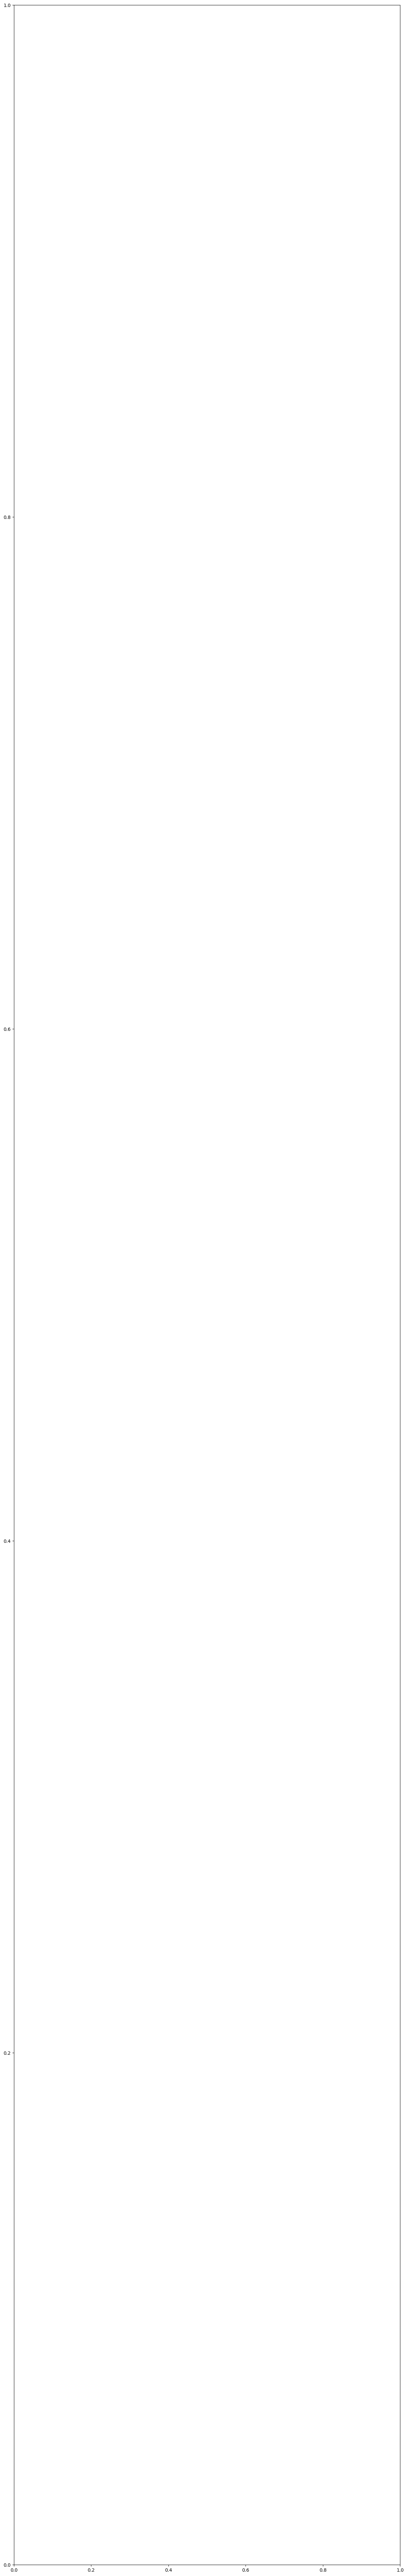

In [45]:
ig, ax = plt.subplots(1, 1, figsize=(15, 100))
ax.matshow(df['Predictions on genre classification'][random_test]).T, aspect='auto' #transposition must be on numpy array --> when running the analysis script it works, 
#but I have to make it work when loading from teh CSV files as the data type is string and not np.aray

ax.set_yticks(range(len(metadata['classes'])))
ax.set_yticklabels(metadata['classes'])
ax.set_xlabel('patch number')
ax.xaxis.set_ticks_position('bottom')
plt.title('Tag activations')
plt.show()

count    2120.000000
mean      119.122614
std        25.191595
min        60.185352
25%        97.403732
50%       119.761127
75%       136.064182
max       184.570267
Name: BPM, dtype: float64


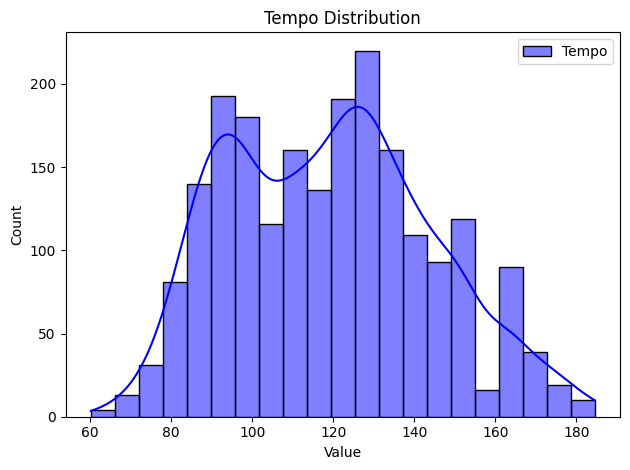

In [49]:
print(df['BPM'].describe())

# Plot Tempo distribution
sns.histplot(df['BPM'], kde=True, color='blue', label='Tempo')

plt.title('Tempo Distribution')
plt.xlabel('Value')
plt.legend()

# Adjust the layout
plt.tight_layout()
plt.show()

count    2120.000000
mean        1.371767
std         0.420245
min         0.637987
25%         1.115979
50%         1.288096
75%         1.533351
max         7.057139
Name: Danceability, dtype: float64


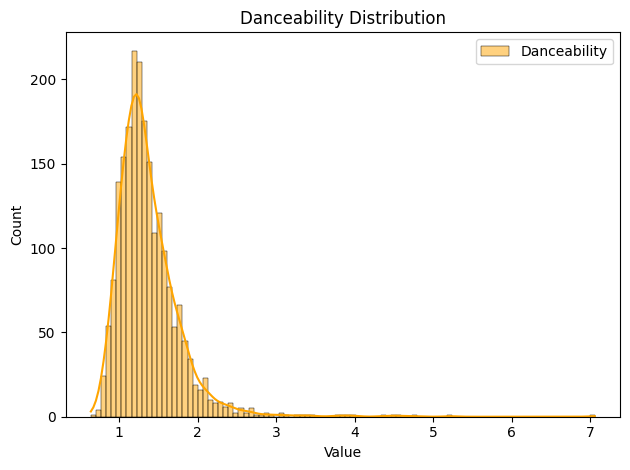

In [48]:
# Plot Danceability distribution
print(df['Danceability'].describe())

sns.histplot(df['Danceability'], kde=True, color='orange', label='Danceability')

plt.title('Danceability Distribution')
plt.xlabel('Value')
plt.legend()

# Adjust the layout
plt.tight_layout()
plt.show()

count     2120
unique      12
top          C
freq       330
Name: Key (temperley), dtype: object
count     2120
unique      12
top          C
freq       337
Name: Key (krumhansl), dtype: object
count     2120
unique      12
top          C
freq       336
Name: Key (edma), dtype: object


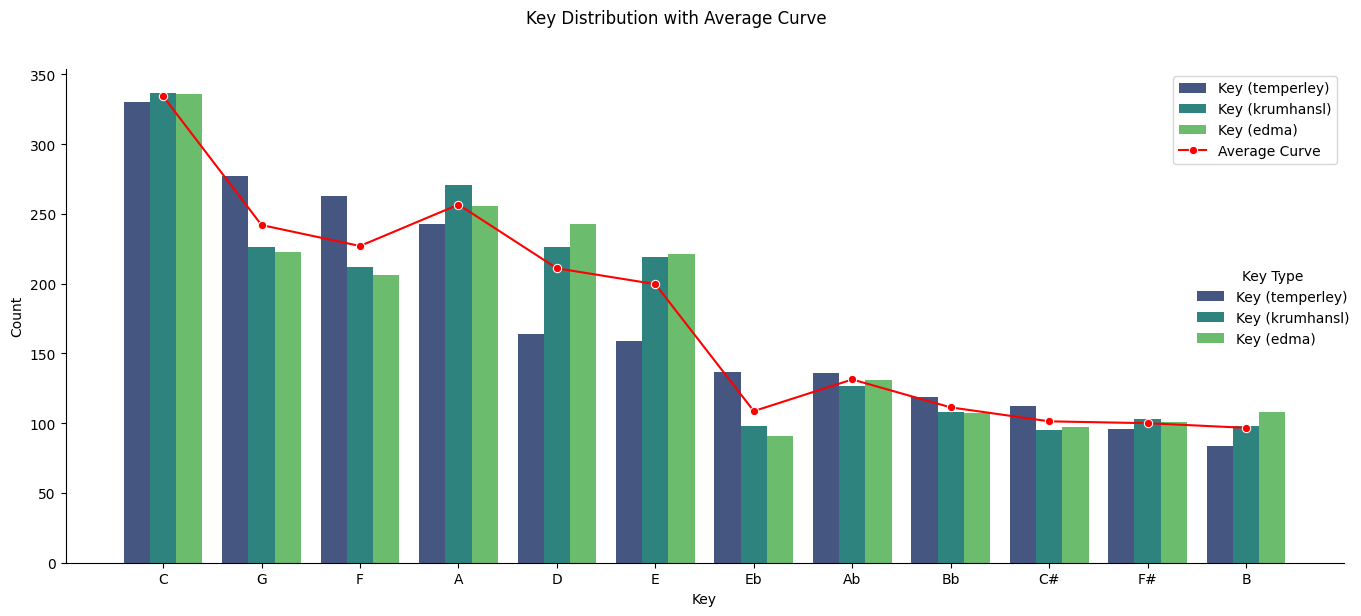

In [47]:
print(df['Key (temperley)'].describe())
print(df['Key (krumhansl)'].describe())
print(df['Key (edma)'].describe())

# Melt the DataFrame to create a long-form for better visualization
melted_df = df.melt(id_vars=['Source file'], value_vars=['Key (temperley)', 'Key (krumhansl)', 'Key (edma)'], var_name='Key Type', value_name='Key')

# Set the order for keys for better visualization
key_order = df['Key (temperley)'].value_counts().index

# Use catplot to avoid overlapping bars
g = sns.catplot(x='Key', kind='count', hue='Key Type', data=melted_df, palette='viridis', order=key_order, height=6, aspect=2)

# Calculate average counts for each key
average_counts = melted_df.groupby(['Key', 'Key Type']).size().groupby('Key').mean().reset_index(name='Average Count')

# Plot average curve
sns.lineplot(x='Key', y='Average Count', data=average_counts, color='red', marker='o', label='Average Curve')

# Set titles and labels
g.fig.suptitle('Key Distribution with Average Curve', y=1.02)
g.set(xlabel='Key', ylabel='Count')

# Adjust the layout
plt.tight_layout()
plt.show()

count    2120.000000
mean      -10.971621
std         3.553718
min       -19.997114
25%       -13.270788
50%       -10.238310
75%        -8.266525
max        -5.011003
Name: Integrated loudness, dtype: float64


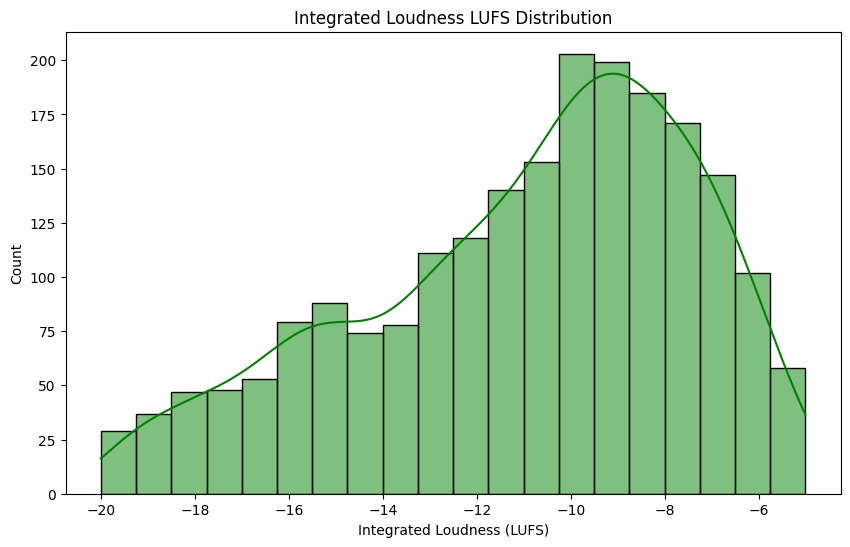

In [46]:
print(df['Integrated loudness'].describe())

plt.figure(figsize=(10, 6))

# Plot Integrated loudness distribution
sns.histplot(df['Integrated loudness'], kde=True, color='green', bins=20)
plt.title('Integrated Loudness LUFS Distribution')
plt.xlabel('Integrated Loudness (LUFS)')
plt.show()

In [44]:
# Compute average predictions for each audio track
average_predictions = df['Predictions on valence vs arousal'].apply(lambda x: np.mean(x, axis=0))

# Convert to NumPy array
data_array = np.array(average_predictions.tolist())

# Extract x and y coordinates
x_coords = data_array[:, 0]
y_coords = data_array[:, 1]

# Plot the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords)
plt.title('2D Scatter Plot of Averaged Arousal/Valence Space')
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.show()

AttributeError: 'str' object has no attribute 'shape'

In [50]:
print(df['Predictions on voice vs instrumental'].describe())

# Compute average predictions for each audio track
average_predictions_voice = df['Predictions on voice vs instrumental'].apply(lambda x: np.mean(x, axis=0)) #same here, TODO fix the data type when lodaing from the CSV

# Calculate the overall average vocal and instrumental probabilities
overall_average_vocal = average_predictions_voice.apply(lambda x: x[0]).mean()
overall_average_instrumental = average_predictions_voice.apply(lambda x: x[1]).mean()

# Plot a horizontal bar plot for better visibility
plt.figure(figsize=(10, 6))
plt.barh(['Vocal', 'Instrumental'], [overall_average_vocal, overall_average_instrumental], color=['skyblue', 'lightgreen'])
plt.title('Overall Average Proportion of Vocal vs Instrumental Elements in Music', fontsize=16)
plt.xlabel('Probability', fontsize=12)
plt.ylabel('Element', fontsize=12)

# Display the values on the bars
for index, value in enumerate([overall_average_vocal, overall_average_instrumental]):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=10, color='black', ha='left')

plt.show()

count                                                  2120
unique                                                 2094
top       [[0.8475307  0.15246928]\n [0.53494287 0.46505...
freq                                                      2
Name: Predictions on voice vs instrumental, dtype: object


AxisError: axis 0 is out of bounds for array of dimension 0